# <p align="center"><b>Assignment 2 Group#2</b></p>

ne

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick

In [271]:
plt.style.use('seaborn-v0_8-darkgrid')
matplotlib.rcParams['font.family'] = 'serif'

In [272]:
filename_1 = r"assignment_data.xlsx"
filename_2 = r"EGLKS_data.xlsx"

# **2. The ESG Premium [30 Points]**
___

In [273]:
dataset_1 = pd.read_excel(filename_1)
dataset_1.head()

,Instrument,ISIN,Date,Price Close,std_risk,Mkt-RF,SMB,HML,RF
0,POOL.OQ,US73278L1052,2009-12-31,19.08,-0.261702,2.75,6.05,-0.16,0.01
1,POOL.OQ,US73278L1052,2010-03-31,22.64,-0.258202,6.31,1.48,2.21,0.01
2,POOL.OQ,US73278L1052,2010-06-30,21.92,-0.257222,-5.57,-1.81,-4.70,0.01
3,POOL.OQ,US73278L1052,2010-09-30,20.07,-0.256172,9.54,3.96,-3.16,0.01
4,POOL.OQ,US73278L1052,2010-12-31,22.54,-0.242998,6.82,0.73,3.69,0.01


____
### (a) For each quarter, form risk-sorted portfolios based on the climate risk exposure measure std_risk. Plot the cumulative portfolio returns for the top quintile and bottom quintile portfolios over time. Are the results in line with the predictions of the model of Pastor et al. (2021)? Justify your answer (max. 5 sentences).

In [274]:
# Computing the returns per stock and quarter
dataset_1['Return'] = dataset_1.groupby('Instrument')['Price Close'].pct_change()
dataset_1.dropna(inplace = True)
dataset_1.head()

,Instrument,ISIN,Date,Price Close,std_risk,Mkt-RF,SMB,HML,RF,Return
1,POOL.OQ,US73278L1052,2010-03-31,22.64,-0.258202,6.31,1.48,2.21,0.01,0.186583
2,POOL.OQ,US73278L1052,2010-06-30,21.92,-0.257222,-5.57,-1.81,-4.70,0.01,-0.031802
3,POOL.OQ,US73278L1052,2010-09-30,20.07,-0.256172,9.54,3.96,-3.16,0.01,-0.084398
4,POOL.OQ,US73278L1052,2010-12-31,22.54,-0.242998,6.82,0.73,3.69,0.01,0.123069
5,POOL.OQ,US73278L1052,2011-03-31,24.11,-0.239983,0.46,2.54,-1.83,0.01,0.069654


In [275]:
# Sorting into quintiles based on std_risk
dataset_1['Quintile'] = dataset_1.groupby('Date')['std_risk'].transform(lambda x: pd.qcut(x, 5, labels = False) + 1)

In [276]:
# Average portfolio returns per quintile and date
portfolio_returns = dataset_1.groupby(['Date', 'Quintile'])['Return'].mean().reset_index()

In [277]:
# Now I can pivot the data to have dates as index and quintiles as columns
returns_matrix = portfolio_returns.pivot(index = 'Date', columns = 'Quintile', values = 'Return')
returns_matrix.head()

Quintile,1,2,3,4,5
Date,,,,,
2010-03-31,0.080751,0.106254,0.087528,0.071032,0.059046
2010-06-30,-0.071729,-0.071310,-0.077060,-0.097942,-0.107071
2010-09-30,0.140679,0.120361,0.119121,0.135378,0.141391
2010-12-31,0.106156,0.127211,0.111295,0.117954,0.116096
2011-03-31,0.080608,0.082771,0.096319,0.086956,0.060932


In [278]:
# Cumulative returns
cum_returns = (1 + returns_matrix).cumprod() - 1

In [279]:
cum_returns.head()

Quintile,1,2,3,4,5
Date,,,,,
2010-03-31,0.080751,0.106254,0.087528,0.071032,0.059046
2010-06-30,0.003230,0.027367,0.003723,-0.033867,-0.054346
2010-09-30,0.144363,0.151022,0.123287,0.096926,0.079360
2010-12-31,0.265845,0.297445,0.248304,0.226313,0.204670
2011-03-31,0.367882,0.404835,0.368539,0.332949,0.278074


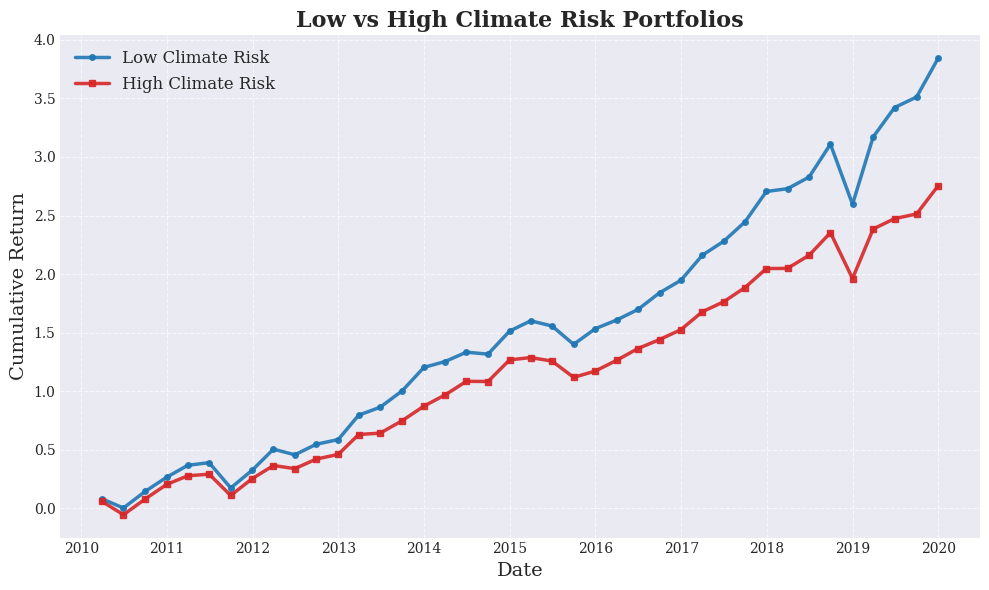

In [280]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cum_returns.index, cum_returns[1], label = 'Low Climate Risk', color = 'tab:blue', linewidth = 2.5, marker = 'o', markersize = 4, alpha = 0.9)
ax.plot(cum_returns.index, cum_returns[5], label = 'High Climate Risk', color = 'tab:red', linewidth = 2.5, marker = 's', markersize = 4, alpha = 0.9)
ax.set_title('Low vs High Climate Risk Portfolios', fontsize = 16, weight = 'bold')
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Cumulative Return', fontsize = 14)
ax.legend(fontsize = 12, loc = 'upper left')
ax.grid(True, which = 'major', linestyle = '--', linewidth = 0.8, alpha = 0.7)
ax.set_axisbelow(True)  
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:.1f}"))
plt.tight_layout()
plt.show();

In [281]:
# GMB returns
gmb_returns = cum_returns[1] - cum_returns[5]
gmb_returns.head()

Date
2010-03-31    0.021705
2010-06-30    0.057577
2010-09-30    0.065003
2010-12-31    0.061175
2011-03-31    0.089809
dtype: float64

In [282]:
gmb_returns = gmb_returns.to_frame(name='GMB_Return')
gmb_returns['year'] = gmb_returns.index.year
gmb_returns['quarter'] = gmb_returns.index.quarter

In [283]:
gmb_returns.head()

,GMB_Return,year,quarter
Date,,,
2010-03-31,0.021705,2010,1
2010-06-30,0.057577,2010,2
2010-09-30,0.065003,2010,3
2010-12-31,0.061175,2010,4
2011-03-31,0.089809,2011,1


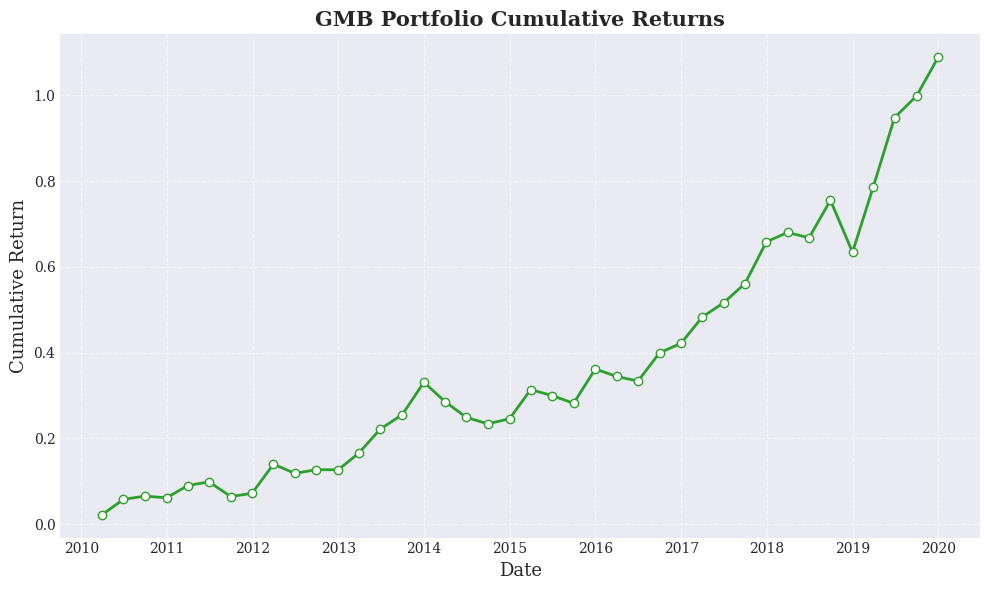

In [284]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(gmb_returns.index, gmb_returns['GMB_Return'], 
        color='tab:green', 
        lw=2, 
        marker='o',           
        markerfacecolor='white',  
        markeredgecolor='tab:green'  
)
ax.set_title('GMB Portfolio Cumulative Returns', fontsize=15, weight='bold')
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Cumulative Return', fontsize=13)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [285]:
# Uploading the EGLKS dataset
dataset_2 = pd.read_excel(filename_2)
dataset_2.head()

,Date,wsj,wsj_AR1_Innovation,chneg,chneg_AR1_innovation
0,198401,0.003589,NaN,NaN,NaN
1,198402,0.004085,-0.000271,NaN,NaN
2,198403,0.003851,-0.000795,NaN,NaN
3,198404,0.003385,-0.001124,NaN,NaN
4,198405,0.003230,-0.001006,NaN,NaN


In [286]:
# Converting the 'Date' column to datetime format
dataset_2['Date'] = pd.to_datetime(dataset_2['Date'], format = '%Y%m')
dataset_2['year'] = dataset_2['Date'].dt.year
dataset_2['quarter'] = dataset_2['Date'].dt.quarter
dataset_2 = dataset_2[dataset_2['year'] >= 2010]
dataset_2.head()

,Date,wsj,wsj_AR1_Innovation,chneg,chneg_AR1_innovation,year,quarter
312,2010-01-01,0.007415,-0.006188,0.002569,-0.003100,2010,1
313,2010-02-01,0.016262,0.009663,0.002396,-0.000013,2010,1
314,2010-03-01,0.009128,-0.002660,0.002046,-0.000237,2010,1
315,2010-04-01,0.009129,0.001526,0.002213,0.000186,2010,2
316,2010-05-01,0.006240,-0.001365,0.002226,0.000077,2010,2


In [287]:
wsj_quarterly = dataset_2.groupby(['year', 'quarter'])['wsj_AR1_Innovation'].mean().reset_index()
wsj_quarterly['Date'] = pd.PeriodIndex.from_fields(year = wsj_quarterly['year'], quarter = wsj_quarterly['quarter'], freq = 'Q').to_timestamp()
wsj_quarterly['cum_innovations'] = wsj_quarterly['wsj_AR1_Innovation'].cumsum()
wsj_quarterly.head()

,year,quarter,wsj_AR1_Innovation,Date,cum_innovations
0,2010,1,0.000272,2010-01-01,0.000272
1,2010,2,0.000258,2010-04-01,0.000530
2,2010,3,0.000791,2010-07-01,0.001321
3,2010,4,0.000529,2010-10-01,0.001849
4,2011,1,-0.000301,2011-01-01,0.001548


In [288]:
merged = pd.merge(gmb_returns, wsj_quarterly, on=['year', 'quarter'], how='inner')

In [289]:
merged.head()

,GMB_Return,year,quarter,wsj_AR1_Innovation,Date,cum_innovations
0,0.021705,2010,1,0.000272,2010-01-01,0.000272
1,0.057577,2010,2,0.000258,2010-04-01,0.000530
2,0.065003,2010,3,0.000791,2010-07-01,0.001321
3,0.061175,2010,4,0.000529,2010-10-01,0.001849
4,0.089809,2011,1,-0.000301,2011-01-01,0.001548


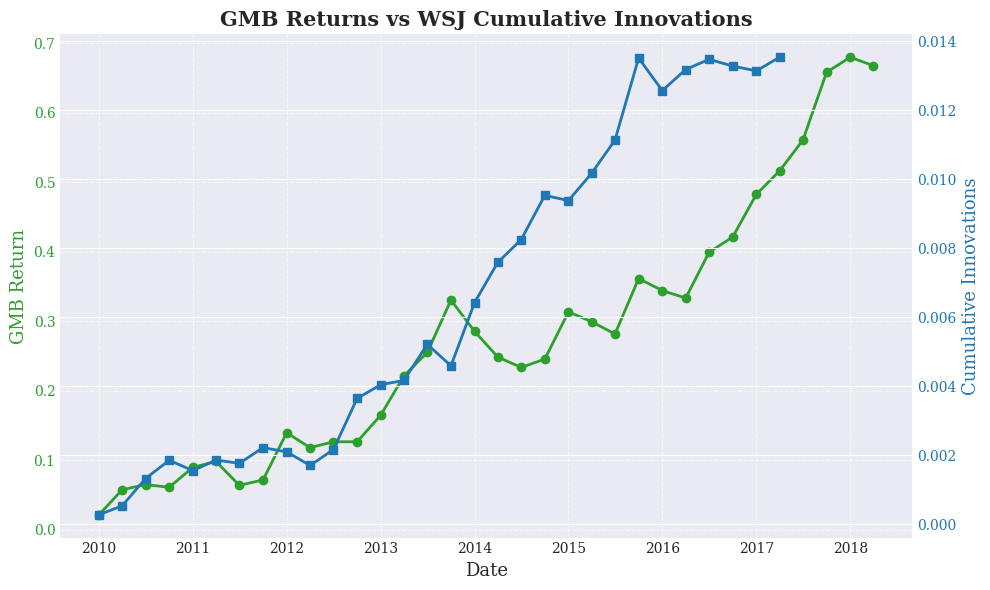

In [290]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(merged['Date'], merged['GMB_Return'], color='tab:green', lw=2, marker='o', label='GMB_Return')
ax1.set_xlabel('Date', fontsize=13)
ax1.set_ylabel('GMB Return', color='tab:green', fontsize=13)
ax1.tick_params(axis='y', labelcolor='tab:green')
ax2 = ax1.twinx()
ax2.plot(merged['Date'], merged['cum_innovations'], color='tab:blue', lw=2, marker='s', label='Cum Innovations')
ax2.set_ylabel('Cumulative Innovations', color='tab:blue', fontsize=13)
ax2.tick_params(axis='y', labelcolor='tab:blue')
plt.title('GMB Returns vs WSJ Cumulative Innovations', fontsize=15, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()